<a href="https://colab.research.google.com/github/usamasansi/AiRespository/blob/main/03_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [2]:
dataset = MNIST(root='data/', download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 21492120.16it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 669883.45it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 5570211.78it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 9403025.06it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [3]:
len(dataset)

60000

In [4]:
type(dataset)

torchvision.datasets.mnist.MNIST

In [5]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [6]:



dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


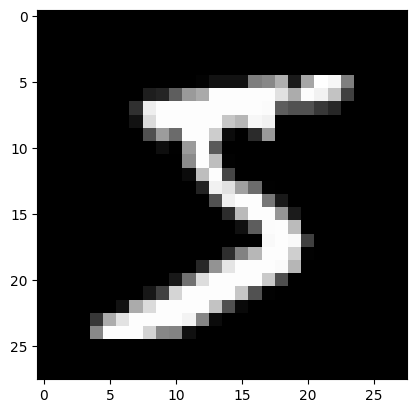

In [8]:
image, label = dataset[0]
plt.imshow(image, cmap='gray')
print('Label:', label)

Label: 3


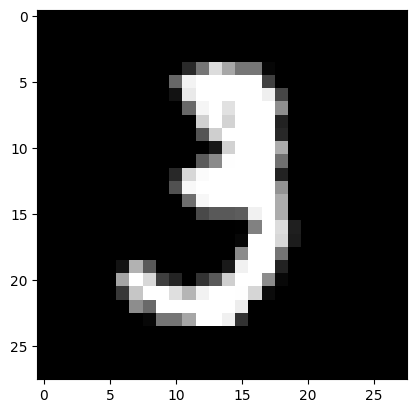

In [9]:
image, label = dataset[10]
plt.imshow(image, cmap='gray')
print('Label:', label)

In [10]:
import torchvision.transforms as transforms

In [11]:
# MNIST datset (images, and lables)
dataset = MNIST(root='data/',
                train=True,
                transform = transforms.ToTensor())

In [12]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [13]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


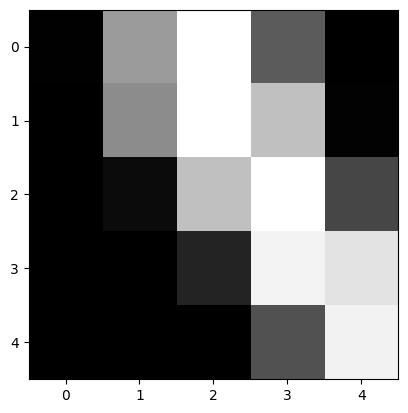

In [14]:
# plot the image by passing the 28 * 28 matrix
plt.imshow(img_tensor[0,10:15,10:15], cmap='gray')

In [15]:
# trainig datset and validation dataset splitiing
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [16]:
# define batch size for trainig and validation dataloaders it;s better appraoch becaus it enhace speed of trainig
from torch.utils.data import DataLoader

batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

**logistic model**

In [17]:
import torch.nn as nn
input_size = 28 *28
num_classes = 10
# logistic regression model
model = nn.Linear(input_size, num_classes)

In [18]:
print(model.weight.shape)
model.weight


torch.Size([10, 784])


Parameter containing:
tensor([[-0.0057,  0.0290, -0.0239,  ..., -0.0318,  0.0037,  0.0211],
        [ 0.0257,  0.0207, -0.0347,  ..., -0.0262,  0.0304,  0.0044],
        [ 0.0199, -0.0032, -0.0122,  ...,  0.0314,  0.0134, -0.0056],
        ...,
        [-0.0171,  0.0162,  0.0208,  ..., -0.0334, -0.0344,  0.0271],
        [-0.0274, -0.0056, -0.0203,  ..., -0.0028, -0.0082,  0.0226],
        [ 0.0105,  0.0009, -0.0126,  ...,  0.0256,  0.0023, -0.0145]],
       requires_grad=True)

In [19]:
print(model.bias.shape)
model.bias

torch.Size([10])


Parameter containing:
tensor([-0.0202,  0.0080, -0.0275,  0.0095, -0.0310, -0.0040,  0.0078, -0.0344,
         0.0266,  0.0031], requires_grad=True)

In [20]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)

    # Flatten the images before passing them to the model
    images = images.view(images.size(0), -1)  # Flatten the images

    outputs = model(images)
    break


tensor([4, 0, 9, 2, 4, 1, 3, 7, 9, 9, 4, 4, 8, 2, 3, 8, 6, 1, 1, 0, 1, 0, 2, 1,
        9, 1, 9, 5, 1, 0, 0, 1, 9, 8, 9, 9, 5, 2, 1, 4, 1, 2, 4, 2, 4, 1, 2, 9,
        8, 6, 7, 4, 7, 8, 6, 4, 3, 0, 6, 3, 9, 5, 8, 6, 6, 1, 4, 8, 6, 0, 1, 6,
        6, 8, 1, 0, 7, 2, 5, 4, 7, 6, 6, 2, 7, 0, 0, 5, 2, 2, 6, 8, 6, 1, 4, 8,
        0, 2, 1, 6, 2, 8, 1, 4, 6, 8, 9, 1, 3, 7, 6, 5, 1, 7, 9, 6, 0, 6, 5, 2,
        1, 4, 9, 3, 0, 3, 9, 9])
torch.Size([128, 1, 28, 28])


In [21]:
images.reshape(-1,784).shape

torch.Size([128, 784])

In [22]:
class MinistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
      xb = xb.reshape(-1, 784)
      print("after reshaping: ", xb.shape)
      out = self.linear(xb)
      return out


model = MinistModel()

In [23]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[ 0.0059,  0.0010,  0.0053,  ...,  0.0356, -0.0005, -0.0038],
         [-0.0066, -0.0147, -0.0131,  ..., -0.0093,  0.0287,  0.0242],
         [-0.0151, -0.0274,  0.0114,  ...,  0.0189,  0.0351,  0.0112],
         ...,
         [-0.0089, -0.0074, -0.0293,  ..., -0.0119,  0.0023,  0.0143],
         [ 0.0048, -0.0293,  0.0310,  ..., -0.0151,  0.0023,  0.0321],
         [ 0.0175, -0.0268,  0.0005,  ...,  0.0339,  0.0069, -0.0062]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0163,  0.0246,  0.0036,  0.0247,  0.0017,  0.0067,  0.0099,  0.0299,
         -0.0220, -0.0133], requires_grad=True)]

In [24]:
for image, labels in train_loader:
  outputs = model(images)
  break




print("output shape", outputs.shape)
print("sample outputs: \n", outputs[:2].data)


after reshaping:  torch.Size([128, 784])
output shape torch.Size([128, 10])
sample outputs: 
 tensor([[ 0.1096,  0.0454,  0.0160, -0.0210, -0.2566,  0.1003,  0.2390, -0.3370,
         -0.1259, -0.1092],
        [ 0.0050,  0.0959,  0.0496,  0.0880, -0.3766,  0.2372,  0.1975, -0.2669,
         -0.1480, -0.0578]])


In [25]:
import torch.nn.functional as F

In [26]:
# apply softymax
probs = F.softmax(outputs, dim=1)
# look at sample probabilties
print("sample probabilties :\n", probs[:2].data)

# adfd up the probabilties of an output row
print("sum:", torch.sum(probs[0]).item())

sample probabilties :
 tensor([[0.1139, 0.1068, 0.1037, 0.0999, 0.0790, 0.1128, 0.1296, 0.0729, 0.0900,
         0.0915],
        [0.1006, 0.1101, 0.1052, 0.1093, 0.0687, 0.1269, 0.1219, 0.0766, 0.0863,
         0.0944]])
sum: 1.0


In [27]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([6, 5, 3, 1, 6, 7, 3, 6, 6, 6, 6, 6, 6, 3, 6, 2, 3, 1, 1, 1, 1, 3, 6, 1,
        0, 1, 1, 3, 1, 0, 6, 1, 6, 2, 1, 6, 3, 6, 3, 0, 1, 6, 6, 5, 6, 2, 6, 6,
        6, 6, 6, 6, 0, 2, 6, 6, 1, 6, 0, 1, 0, 6, 6, 6, 5, 3, 1, 6, 6, 3, 1, 2,
        6, 6, 3, 6, 6, 5, 2, 6, 6, 6, 1, 6, 3, 0, 0, 3, 0, 5, 0, 6, 6, 1, 1, 6,
        1, 1, 3, 2, 6, 6, 1, 6, 5, 6, 6, 1, 1, 6, 6, 3, 6, 0, 6, 6, 6, 6, 6, 6,
        3, 6, 1, 1, 3, 2, 6, 6])
tensor([0.1296, 0.1269, 0.1357, 0.1425, 0.1430, 0.1154, 0.1405, 0.1226, 0.1486,
        0.1458, 0.1279, 0.1413, 0.1465, 0.1212, 0.1511, 0.1311, 0.1322, 0.1383,
        0.1180, 0.1293, 0.1203, 0.1331, 0.1486, 0.1392, 0.1250, 0.1373, 0.1214,
        0.1336, 0.1344, 0.1473, 0.1464, 0.1375, 0.1356, 0.1308, 0.1501, 0.1285,
        0.1593, 0.1667, 0.1269, 0.1281, 0.1287, 0.1340, 0.1471, 0.1425, 0.1324,
        0.1207, 0.1497, 0.1461, 0.1318, 0.1251, 0.1426, 0.1340, 0.1527, 0.1374,
        0.1419, 0.1425, 0.1388, 0.1402, 0.1304, 0.1354, 0.1365, 0.1312, 0.1563,
       

In [28]:
labels

tensor([3, 4, 9, 0, 9, 1, 8, 6, 3, 8, 0, 2, 0, 1, 9, 9, 3, 2, 4, 4, 7, 9, 1, 1,
        7, 6, 8, 2, 1, 2, 4, 4, 1, 2, 2, 9, 4, 9, 7, 3, 7, 0, 9, 0, 0, 4, 0, 1,
        1, 3, 8, 8, 9, 0, 4, 6, 2, 7, 3, 6, 7, 3, 0, 7, 3, 1, 7, 8, 7, 1, 6, 1,
        7, 4, 2, 2, 1, 7, 2, 2, 6, 9, 4, 5, 2, 4, 4, 8, 2, 3, 7, 9, 5, 8, 0, 5,
        4, 9, 3, 1, 3, 0, 8, 9, 8, 8, 7, 9, 9, 3, 3, 4, 9, 8, 0, 3, 7, 3, 2, 1,
        2, 2, 6, 0, 2, 6, 2, 1])

In [29]:
torch.sum(labels == preds).item() / len(preds)

0.0703125

In [31]:
def accuracy(outputs, labels):
  _, preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [33]:
accuracy(outputs, labels)

tensor(0.0703)

In [35]:
loss_fn = F.cross_entropy

In [36]:
# loss for current batch of da6ta
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3263, grad_fn=<NllLossBackward0>)


In [37]:
class MinistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self, xb):
    xb = xb.reshape(-1, 784)
    out = self.linear(xb)
    return out

  def training_step(self, batch):
    images, labels = batch
    out = self(images)   #generate predictions
    loss = F.cross_entropy(out, labels) #loss calculation
    return loss

  def validation_step(self, batch):
    images, labels = batch
    out = self(images)
    loss = F.cross_entropy(out, labels)
    acc = accuracy(out, labels)
    return  {'val_loss': loss, 'val_acc': acc}

  def validation_epoch_end(self,outputs):
    batch_losses = [x['val_loss']for x in outputs]
    epoch_loss = torch.stack(batch_losses).mean()
    batch_accs = [x['val_acc'] for x in outputs]
    epoch_acc = torch.stack(batch_accs).mean()
    return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

  def epoch_end(self, epoch, result):
    print("Epoch [{}], va_loss: {:.4f}, val_acc:{.4f}".format(epoch, result['val_loss'], result['val_acc']))
model = MinistModel()




In [38]:
def evaluate(model, val_loader):
  outputs  = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    # trainig pahes
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

      # validation phase

    result = evaluate(model, val_loader)
    model.epoch_end(epoch, result)
    history.append(result)
    return history


In [39]:
evaluate(model, val_loader)

{'val_loss': 2.2852590084075928, 'val_acc': 0.12262658029794693}

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Assuming X and y are your feature matrix and target labels
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the Logistic Regression model
LR = LogisticRegression(penalty='l2', C=10.0)

# Fit the model to the training data
LR = LR.fit(X_train, y_train)

# Predict on the test data
y_predict = LR.predict(X_test)

# Get the coefficients
LR.coef_


NameError: name 'X' is not defined